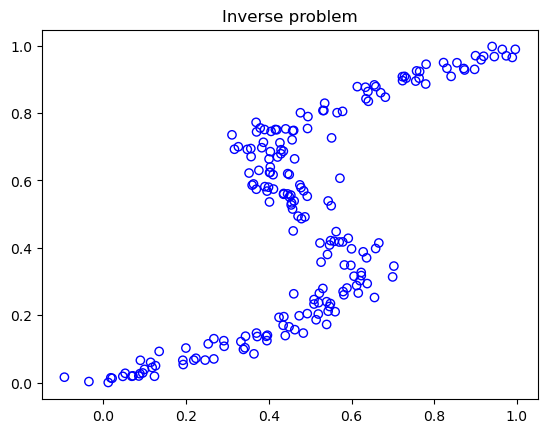

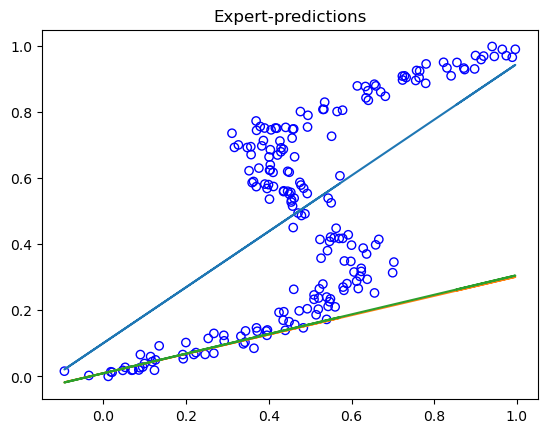

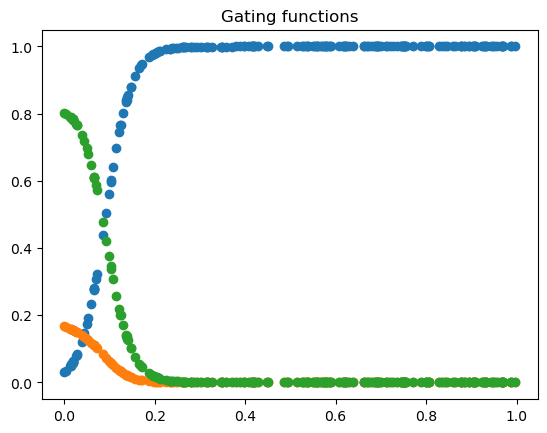

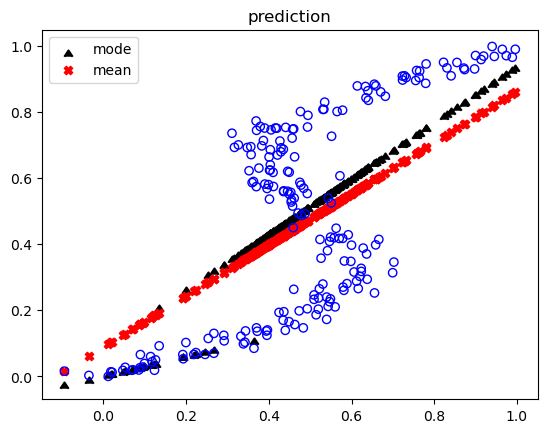

In [7]:
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

n = 200
np.random.seed(1)
y = np.random.rand(n, 1)
eta = np.random.randn(n,1)*0.05
x = y + 0.3*np.sin(2*3.1415*y) + eta
data = np.concatenate((x, y), axis=1)
K = 3

X = x.reshape(-1, 1)
y = y.reshape(-1, 1)
xtest = (x)
ytest = (y)

plt.figure()
plt.scatter(x, y, edgecolors='blue', color="none")
plt.title('Inverse problem')
# pml.savefig('mixexp_inverse.pdf')
plt.show()

def normalizelogspace(x):
  L = logsumexp(x, axis=1).reshape(-1, 1)
  Lnew = np.repeat(L, 3, axis=1)
  y = x - Lnew
  return y, Lnew

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

K = 3 #nmix
D = np.size(X, axis=1)
N = np.size(X, axis=0)
norm = 50
max_iter = 3
iteration = 2
r = np.zeros((N, K))
while iteration < max_iter:
      #E-step :
      np.random.seed(iteration)
      Wy = 0.1*np.random.randn(D, K)
      bias = 0.3*np.random.randn(D, K)
      mixweights = np.random.rand(1, K)
      normmw =  np.linalg.norm(mixweights)
      mixweights = mixweights/normmw
      sigma2 = 0.1*np.random.randn(1, K)
      q = np.log(mixweights)
      logprior = np.repeat(q, N, axis=0)
      loglik = np.zeros((N, K))
      for k in range(K):
        vecM = X*Wy[:, k] + bias[:, k]
        vecM = vecM.reshape(200, )
        cov = sigma2[0, k]
        cov = np.abs(cov)
        vecX = y
        x = multivariate_normal.logpdf(vecX, mean=vecM, cov=cov)
        x = x /norm
        loglik[:, k] = x
      logpost = loglik + logprior
      logpost, logZ = normalizelogspace(logpost)
      ll = np.sum(logZ)
      post = np.exp(logpost)

      #M-step:
      r = post
      mixweights = np.sum(r, axis=0)/N
      mixweights = mixweights.reshape(1, -1)

      for k in range(K):
        reg = LinearRegression()
        model = reg.fit(X, y, r[:, k])
        Wy[:, k] = model.coef_
        bias[:, k] = model.intercept_
        yhat_ = np.multiply(X, Wy[:, k]) + bias[:, k]
        sigma2[:, k] = np.sum(np.multiply(r[:, k], np.square(y-yhat_))) / sum(r[:, k])

      iteration = iteration + 1

N = np.size(X, axis=0)
D = np.size(X, axis=1)
K = 3
weights = np.repeat(mixweights, N, axis=0)
muk = np.zeros((N, K))
vk = np.zeros((N, K))
mu = np.zeros((N, ))
v = np.zeros((N, 1))
b = 0.3*np.random.randn(D, K)
for k in range(K):
    w = X*Wy[:, k] + bias[:, k]
    w = w.reshape(-1, )
    muk[:, k] = w
    q = np.multiply(weights[:, k], muk[:, k])
    mu = mu + q
    vk[:, k] = sigma2[:, k]
    v = v + np.multiply(weights[:, k], (vk[:, k] + np.square(muk[:, k]))).reshape(-1, 1)

v = v - np.square(mu).reshape(-1, 1)

plt.figure()
plt.scatter(xtest, y, edgecolors='blue', color="none")
plt.plot(xtest, muk[:, 0])
plt.plot(xtest, muk[:, 1])
plt.plot(xtest, muk[:, 2])
plt.title('Expert-predictions')
plt.show()

plt.figure()
for i in range(K):
  plt.scatter(y, post[:, i])
plt.title('Gating functions')
plt.show()

map = np.empty((K, 1))
map = np.argmax(post, axis=1)
map = map.reshape(-1, 1)
yhat = np.empty((N, 1))
for i in range(N):
  yhat[i, 0] = muk[i, map[i, 0]]

plt.figure()
plt.scatter(xtest, yhat, marker=6, color='black')
plt.scatter(xtest, mu, marker='X', color='red')
plt.scatter(xtest, y, edgecolors='blue', color="none")
plt.title('prediction')
plt.legend(['mode', 'mean'])
plt.show()

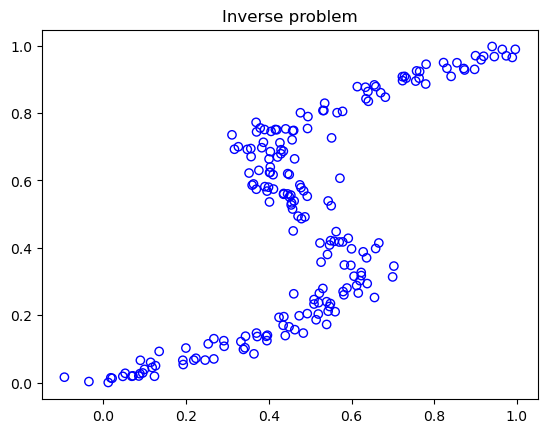

(200, 1)
(200, 1)


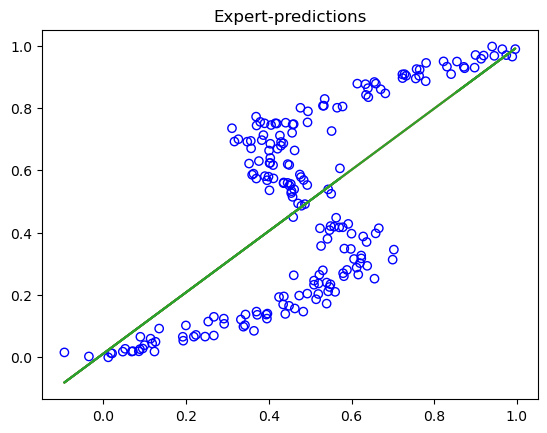

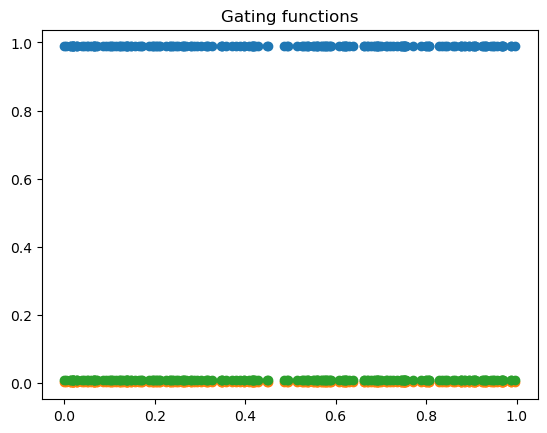

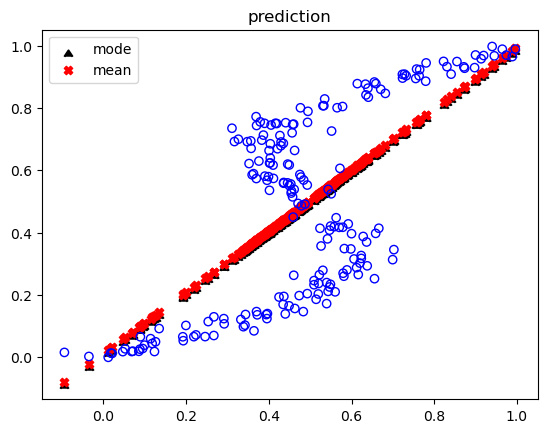

In [13]:
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

n = 200
np.random.seed(1)
y = np.random.rand(n, 1)
eta = np.random.randn(n,1)*0.05
x = y + 0.3*np.sin(2*3.1415*y) + eta
data = np.concatenate((x, y), axis=1)
K = 3

X = x.reshape(-1, 1)
y = y.reshape(-1, 1)
xtest = (x)
ytest = (y)

plt.figure()
plt.scatter(x, y, edgecolors='blue', color="none")
plt.title('Inverse problem')
# pml.savefig('mixexp_inverse.pdf')
plt.show()

def normalizelogspace(x):
  L = logsumexp(x, axis=1).reshape(-1, 1)
  Lnew = np.repeat(L, 3, axis=1)
  y = x - Lnew
  return y, Lnew

def is_pos_def(x):
  return np.all(np.linalg.eigvals(x) > 0)

def softmax(x):
  e_x = np.exp(x)  # Subtracting max for numerical stability
  return e_x / e_x.sum()

print(X.shape)
print(softmax(X).shape)

K = 3 #nmix
D = np.size(X, axis=1)
N = np.size(X, axis=0)
norm = 50
max_iter = 3
iteration = 0
r = np.zeros((N, K))

np.random.seed(42)
W = 0.1*np.random.randn(K, D)
V = np.random.randn(K, D)
sigmas = np.random.randn(K)
# normmw =  np.linalg.norm(mixweights)
# mixweights = mixweights/normmw
# sigma2 = 0.1*np.random.randn(1, K)

while iteration < max_iter:
  # Expectation Step:

  mixing_weights = 3

  q = np.log(mixweights)
  logprior = np.repeat(q, N, axis=0)
  loglik = np.zeros((N, K))
  for k in range(K):
    vecM = X*Wy[:, k] + bias[:, k]
    vecM = vecM.reshape(200, )
    cov = sigma2[0, k]
    cov = np.abs(cov)
    vecX = y
    x = multivariate_normal.logpdf(vecX, mean=vecM, cov=cov)
    x = x /norm
    loglik[:, k] = x
  logpost = loglik + logprior
  logpost, logZ = normalizelogspace(logpost)
  ll = np.sum(logZ)
  post = np.exp(logpost)

  #M-step:
  r = post
  mixweights = np.sum(r, axis=0)/N
  mixweights = mixweights.reshape(1, -1)

  for k in range(K):
    reg = LinearRegression()
    model = reg.fit(X, y, r[:, k])
    Wy[:, k] = model.coef_
    bias[:, k] = model.intercept_
    yhat_ = np.multiply(X, Wy[:, k]) + bias[:, k]
    sigma2[:, k] = np.sum(np.multiply(r[:, k], np.square(y-yhat_))) / sum(r[:, k])

  iteration = iteration + 1

N = np.size(X, axis=0)
D = np.size(X, axis=1)
K = 3
weights = np.repeat(mixweights, N, axis=0)
muk = np.zeros((N, K))
vk = np.zeros((N, K))
mu = np.zeros((N, ))
v = np.zeros((N, 1))
b = 0.3*np.random.randn(D, K)
for k in range(K):
    w = X*Wy[:, k] + bias[:, k]
    w = w.reshape(-1, )
    muk[:, k] = w
    q = np.multiply(weights[:, k], muk[:, k])
    mu = mu + q
    vk[:, k] = sigma2[:, k]
    v = v + np.multiply(weights[:, k], (vk[:, k] + np.square(muk[:, k]))).reshape(-1, 1)

v = v - np.square(mu).reshape(-1, 1)

plt.figure()
plt.scatter(xtest, y, edgecolors='blue', color="none")
plt.plot(xtest, muk[:, 0])
plt.plot(xtest, muk[:, 1])
plt.plot(xtest, muk[:, 2])
plt.title('Expert-predictions')
plt.show()

plt.figure()
for i in range(K):
  plt.scatter(y, post[:, i])
plt.title('Gating functions')
plt.show()

map = np.empty((K, 1))
map = np.argmax(post, axis=1)
map = map.reshape(-1, 1)
yhat = np.empty((N, 1))
for i in range(N):
  yhat[i, 0] = muk[i, map[i, 0]]

plt.figure()
plt.scatter(xtest, yhat, marker=6, color='black')
plt.scatter(xtest, mu, marker='X', color='red')
plt.scatter(xtest, y, edgecolors='blue', color="none")
plt.title('prediction')
plt.legend(['mode', 'mean'])
plt.show()